# Intro to Image Processing & Tips in Deep Learning

This practice aims to explore different techniques in Deep Learning that can be applied to improve feature learning.
 

Useful Reference:
1. https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb (Links to an external site.)
2. https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ (Links to an external site.)
3. Google resources
 

Recommended Papers:
Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift(https://arxiv.org/pdf/1502.03167.pdf (Links to an external site.))
Understanding the difficulty of training deep feedforward neural networks(http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf (Links to an external site.))

In [ ]:
# step 1.1: download an online image
!wget https://images.all-free-download.com/images/graphicthumb/airplane_landing_199029.jpg

--2022-04-08 01:22:17--  https://images.all-free-download.com/images/graphicthumb/airplane_landing_199029.jpg
Resolving images.all-free-download.com (images.all-free-download.com)... 51.81.66.158
Connecting to images.all-free-download.com (images.all-free-download.com)|51.81.66.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42917 (42K) [image/jpeg]
Saving to: ‘airplane_landing_199029.jpg’

airplane_landing_19 100%[===================>]  41.91K  --.-KB/s    in 0s      

2022-04-08 01:22:17 (296 MB/s) - ‘airplane_landing_199029.jpg’ saved [42917/42917]



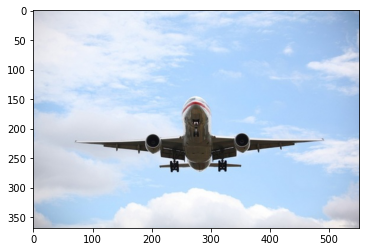

In [ ]:
# step 1.2: load image into python
import matplotlib.pyplot as plt
data = plt.imread('airplane_landing_199029.jpg')
plt.imshow(data)
plt.show()

Note: The color image has three dimensions, where the first two dimensions correspond to the height and width of the image. The total number of pixels is height*width. The last dimension (i.e., 3) corresponds to the three color channels (red, green, and blue colors) in each pixel.

In [ ]:
data[0][0][0]

193

In [ ]:
type(data)

numpy.ndarray

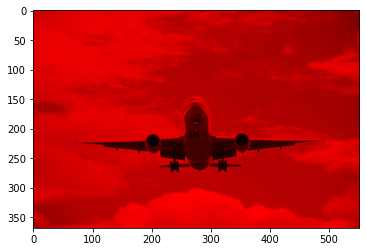

In [ ]:
# Step 2: After loading the image, the image data can be also modified by changing the array values

# step 2.1: Modify the image to red channel only
data_modified = data.copy()
data_modified[:,:,1] = 0 # set intensity of green channel to 0
data_modified[:,:,2] = 0 # set intensity of blue channel to 0
plt.imshow(data_modified) # only show red channel
plt.show()

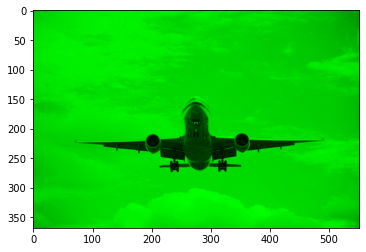

In [ ]:
# step 2.2: Modify the image to green channel only
data_modified = data.copy()
data_modified[:,:,0] = 0 # set intensity of red channel to 0
data_modified[:,:,2] = 0 # set intensity of blue channel to 0
plt.imshow(data_modified) # only show red channel
plt.show()

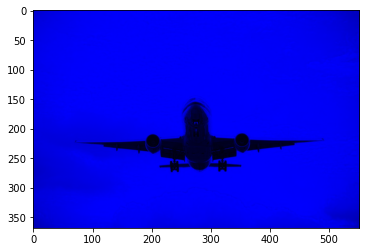

In [ ]:
# Task: How to modify the image to the blue channel only as follows? Provide your codes in this box.

data_modified = data.copy()
data_modified[:,:,0] = 0 # set intensity of red channel to 0
data_modified[:,:,1] = 0 # set intensity of green channel to 0
plt.imshow(data_modified) # only show blue channel
plt.show()

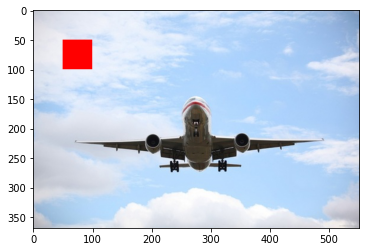

In [ ]:
# Step 3: You can also modify the specific regions in the image using matrix manipulation

# step 3.1: Add red mask to the specific regions within the image**
data_modified = data.copy()
data_modified[50:100,50:100,:] = [255,0,0] # change subregion to red only, make sure the order of channel colors is [red,green,blue]
plt.imshow(data_modified)
plt.show()

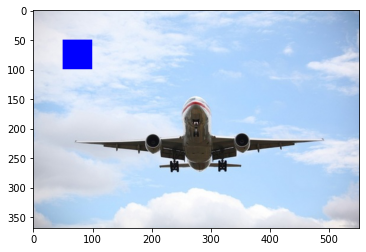

In [ ]:
# Question 1: Write your codes to add a blue mask to the specific regions within the image
data_modified = data.copy()
data_modified[50:100,50:100,:] = [0,0,255] # change subregion to red only, make sure the order of channel colors is [red,green,blue]
plt.imshow(data_modified)
plt.show()

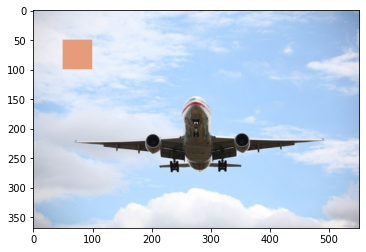

In [ ]:
# Question 2: You can also set the mask to other colors, replacing  [255,0,0] to  [215,120,234] or 
# any other random numbers for each channel (you can get customized color at 
# https://www.rapidtables.com/web/color/RGB_Color.html (Links to an external site.)).

data_modified = data.copy()
data_modified[50:100,50:100,:] = [230,156,123] # change subregion to red only, make sure the order of channel colors is [red,green,blue]
plt.imshow(data_modified)
plt.show()


In [ ]:
# Step 4: Apply image processing on the CIFAR10 image dataset 
# About CIFAR10
# In addition to the MNIST dataset we have practiced in the class, we will work 
# on another popular dataset called 'CIFAR10', containing 32x32 color images of 
# 10 categories of objects. Below are labels for the objects - airplane, 
# automobile, bird, cat, deer, dog, frog, horse, ship, and truck.
# We can directly load the dataset into python from module 'keras.datasets,' which contains:
# Training Set: 50000 images, dimension shape: 50000 * 32 * 32 *3
# Test Set: 10000 images, dimension shape: 10000 * 32 * 32 *3

# Step 4: Apply image processing on the CIFAR10 image dataset 
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (50000, 32, 32, 3)
X_test.shape:  (10000, 32, 32, 3)
y_train.shape:  (50000, 1)
y_test.shape:  (10000, 1)


In [ ]:
X_train[0][0][0][0]

59

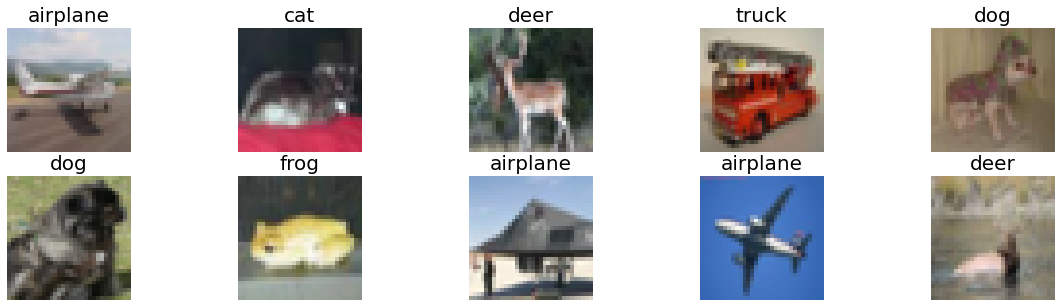

In [ ]:
# Step 5: Using matplotlib, you can visualize the NumPy data as an image as follows:

fig = plt.figure(figsize=(20, 5))

for ii in range(10):
   # sample a random image from X_train
   image_indx = np.random.choice(range(len(X_train)))
   image_random = X_train[image_indx]
   image_title = labels_map[y_train[image_indx][-1]]
    
   # put image into subplots
   imgplot = fig.add_subplot(2,5,ii+1) 
   imgplot.imshow(image_random)
   imgplot.set_title(image_title, fontsize=20)
   imgplot.axis('off')


In [ ]:
# Step 6: We can also save the NumPy array into an image format using the following codes

# Step 6.1: sample a random image
image_index = np.random.choice(range(len(X_train)))
image_example = X_train[image_index]
image_example

array([[[ 10,  12,  14],
        [ 19,  21,  19],
        [ 17,  19,  18],
        ...,
        [ 22,  23,  22],
        [ 22,  24,  20],
        [ 15,  16,  16]],

       [[ 39,  53,  54],
        [ 67,  96,  93],
        [ 76,  90,  90],
        ...,
        [ 70,  75,  60],
        [ 76,  82,  57],
        [ 58,  61,  50]],

       [[ 46,  76,  75],
        [ 86, 160, 154],
        [103, 158, 155],
        ...,
        [ 63,  71,  51],
        [ 75,  84,  52],
        [ 63,  69,  53]],

       ...,

       [[ 73,  76,  78],
        [106, 114, 128],
        [ 97, 102, 118],
        ...,
        [140, 146, 111],
        [145, 152, 110],
        [ 99, 105,  74]],

       [[ 52,  53,  54],
        [103, 105, 112],
        [136, 131, 137],
        ...,
        [117, 122,  95],
        [124, 129,  99],
        [ 83,  87,  65]],

       [[  9,   9,  10],
        [ 25,  25,  25],
        [ 40,  40,  39],
        ...,
        [ 32,  34,  28],
        [ 32,  34,  29],
        [ 20,  21,  18]]

In [ ]:
# Step 6.2:  Use the Python Imaging Library 'PIL' to save image into local file
import PIL
img = PIL.Image.fromarray(X_train[image_index])
img.save('image.jpg')


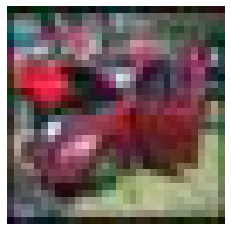

In [ ]:
# Step 6.3:  reload image into python
import matplotlib.pyplot as plt
data = plt.imread('image.jpg') # read the local image
plt.imshow(data)
plt.axis('off')
plt.show()

In [ ]:
data.shape

(32, 32, 3)

In [ ]:
# Step 7:  Application of Machine Learning algorithms in images dataset

## Step 7.1: Load the dataset
from keras.datasets import cifar10
(X_data, y_data), (X_test, y_test) = cifar10.load_data()
print("Training matrix shape", X_data.shape)
print("Testing matrix shape", X_test.shape)
print("y_data matrix shape", y_data.shape)
print("y_test matrix shape", y_test.shape)
print("y_data: ",y_data)

Training matrix shape (50000, 32, 32, 3)
Testing matrix shape (10000, 32, 32, 3)
y_data matrix shape (50000, 1)
y_test matrix shape (10000, 1)
y_data:  [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


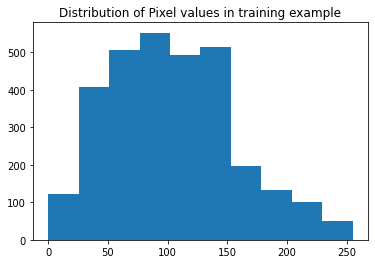

In [ ]:
## Step 7.2: Plot the histogram for the pixels in each image
from matplotlib import pyplot as plt 
plt.hist(X_data[0].flatten(),) 
plt.title("Distribution of Pixel values in training example") 
plt.show()

In [ ]:
# Step 8: Prepare features of inputs for neural network training

# First, the neural network will take a single vector for each training example, 
# so we need to reshape the input so that each 32x32x3 image becomes a single 
# 3072-dimensional vector.  Therefore, the whole dataset for neural network 
# training should have input shape (N,D),
# where N is the total number of images,  D is the total number of features 

N_train = X_data.shape[0]  # the first dimension of the tensor is number of total images
D_train = 32*32*3   # the remaining dimensions of the tensor is the shape of image, you can also use X_data.shape[1]*X_data.shape[2]*X_data.shape[3]
X_data_flatten = X_data.reshape(N_train, D_train)
X_data_flatten = X_data_flatten.astype('float32')

N_test = X_test.shape[0]
D_test = 32*32*3
X_test_flatten = X_test.reshape(N_test,D_test)
X_test_flatten = X_test_flatten.astype('float32')

print("Training matrix shape", X_data_flatten.shape)
print("Testing matrix shape", X_test_flatten.shape)


Training matrix shape (50000, 3072)
Testing matrix shape (10000, 3072)


In [ ]:
# We'll also scale the inputs to be in the range [0-1] rather than [0-255]. 
# We can use min-max normalization here:
X_data_flatten /= 255
X_test_flatten /= 255
X_test_flatten

array([[0.61960787, 0.4392157 , 0.19215687, ..., 0.08235294, 0.2627451 ,
        0.43137255],
       [0.92156863, 0.92156863, 0.92156863, ..., 0.7294118 , 0.78431374,
        0.78039217],
       [0.61960787, 0.74509805, 0.87058824, ..., 0.02745098, 0.03137255,
        0.02745098],
       ...,
       [0.07843138, 0.05882353, 0.04705882, ..., 0.09803922, 0.07843138,
        0.18431373],
       [0.09803922, 0.15686275, 0.04705882, ..., 0.36078432, 0.47058824,
        0.3137255 ],
       [0.28627452, 0.30588236, 0.29411766, ..., 0.10588235, 0.10196079,
        0.10196079]], dtype=float32)

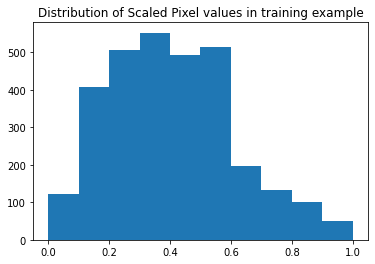

In [ ]:
# Let's visualize the histogram of the scaled data again,

from matplotlib import pyplot as plt 
plt.hist(X_data_flatten[0].flatten(),) 
plt.title("Distribution of Scaled Pixel values in training example") 
plt.show()

In [ ]:
# Step 9: Processing labels of inputs for the neural network

# Our label information is saved in the variable 'y_train', 
# please print the y_train using print(y_data)
print(y_data)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
# For multi-class classification using the softmax function,  we must modify the 
# target matrices to be in the one-hot format, i.e.

# 'airplane' -> 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]

# 'automobile' -> 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

# 'bird' -> 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]

# We can apply tf.keras.utils.to_categorical() function from tensorflow to 
# convert categorical features into one-hot encoding

labels_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', \
              'horse', 'ship', 'truck']
              
nb_classes = len(labels_map)

import tensorflow as tf
y_data_categorical = tf.keras.utils.to_categorical(y_data, nb_classes)
y_test_categorical = tf.keras.utils.to_categorical(y_test, nb_classes)

print("y_data matrix shape", y_data_categorical.shape)
print("y_test matrix shape", y_test_categorical.shape)
print("y_test_categorical: ",y_test_categorical)



y_data matrix shape (50000, 10)
y_test matrix shape (10000, 10)
y_test_categorical:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
y_data_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
#One-hot encoding example
label = ["0","1","1","0","2"]
label = tf.keras.utils.to_categorical(label)
print(label) #output: label = [[1,0],[0,1],[0,1],[1,0]]
label = tf.math.argmax(label, axis=1)
print(label) #output back to [0,1,1,0]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
tf.Tensor([0 1 1 0 2], shape=(5,), dtype=int64)


In [ ]:
# Step 10: Data preparation is done, let's build/Train the neural network 
# (make sure you are using GPU node in Colab)
# Build the neural-network. Here we'll do a simple 3 layer fully connected network.


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.model_selection import train_test_split

## Set up training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_data_flatten,y_data_categorical, test_size=0.2, random_state=42)
def build_model(n_layers = 3, n_neurons = 1000):
   model = Sequential() # create Sequential model
   for i in range(n_layers-1):
       model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions
   model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation

   return model

model = build_model(n_layers = 3, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
train_history = model.fit(X_train,y_train, validation_data=(X_val,y_val), batch_size=128, epochs = 20)



Epoch 1/20
313/313 [==============================] - 6s 6ms/step - loss: 1.9487 - accuracy: 0.3087 - val_loss: 1.7211 - val_accuracy: 0.3849
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 1.6948 - accuracy: 0.3937 - val_loss: 1.6618 - val_accuracy: 0.4001
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 1.6094 - accuracy: 0.4267 - val_loss: 1.5717 - val_accuracy: 0.4379
Epoch 4/20
313/313 [==============================] - 1s 4ms/step - loss: 1.5390 - accuracy: 0.4511 - val_loss: 1.5708 - val_accuracy: 0.4371
Epoch 5/20
313/313 [==============================] - 1s 5ms/step - loss: 1.4914 - accuracy: 0.4659 - val_loss: 1.5141 - val_accuracy: 0.4501
Epoch 6/20
313/313 [==============================] - 1s 5ms/step - loss: 1.4435 - accuracy: 0.4855 - val_loss: 1.5118 - val_accuracy: 0.4549
Epoch 7/20
313/313 [==============================] - 1s 5ms/step - loss: 1.4171 - accuracy: 0.4940 - val_loss: 1.4914 - val_accuracy: 0.4616
Epoch 

In [ ]:
# Step 11:  Access the model training history & Plot the learning curves for training/validation
# Step 11.1:  Access the model training history 
print(train_history.history.keys())
print(train_history.history['loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[1.948731780052185, 1.694766640663147, 1.6093922853469849, 1.5390172004699707, 1.491385579109192, 1.4435129165649414, 1.4170947074890137, 1.391921877861023, 1.3561952114105225, 1.334099292755127, 1.2969794273376465, 1.273627758026123, 1.2539092302322388, 1.2287205457687378, 1.2035337686538696, 1.1737712621688843, 1.1485419273376465, 1.1232701539993286, 1.0918728113174438, 1.0784001350402832]


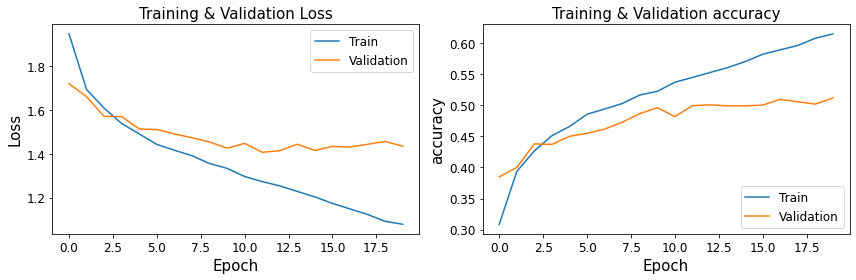

In [ ]:
# Step 11.2:  Plot the learning curves for training/validation
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Step 12:  Let's check the predicted labels of training data using the trained model
train_predicted_labels = model.predict(X_train[0:5,:]) # here we only predict the labels of first 5 images
print("Shape: ",train_predicted_labels.shape)
print(train_predicted_labels)

Shape:  (5, 10)
[[0.04065796 0.01540649 0.05210682 0.2957355  0.11232335 0.21881633
  0.19341254 0.04647082 0.01582202 0.00924819]
 [0.02094125 0.16215307 0.08956525 0.4180664  0.01945878 0.14776148
  0.04677957 0.04309032 0.02571388 0.02647004]
 [0.03976861 0.01543884 0.05511328 0.13788715 0.02377896 0.55220807
  0.0029182  0.14948212 0.00367204 0.01973277]
 [0.02555939 0.02937673 0.0710597  0.210619   0.12793994 0.08660553
  0.24245776 0.09760316 0.01089218 0.09788657]
 [0.0045518  0.00378633 0.02473055 0.63688743 0.10995175 0.17540273
  0.03411957 0.00618014 0.00166064 0.00272909]]


In [ ]:
X_train[0:5,:]

array([[0.13333334, 0.14117648, 0.16862746, ..., 0.22745098, 0.21960784,
        0.22745098],
       [0.35686275, 0.36862746, 0.35686275, ..., 0.5764706 , 0.53333336,
        0.5254902 ],
       [0.8156863 , 0.76862746, 0.61960787, ..., 0.69411767, 0.61960787,
        0.6156863 ],
       [0.5803922 , 0.40392157, 0.28627452, ..., 0.7921569 , 0.5921569 ,
        0.44705883],
       [0.6039216 , 0.1882353 , 0.03137255, ..., 0.18039216, 0.28627452,
        0.20784314]], dtype=float32)

In [ ]:
np.argmax(train_predicted_labels,axis=1) # find the index of column which has maximum value in each row

array([3, 3, 5, 6, 3])

In [ ]:
#  Step 13:  Evaluate the classification performance

from sklearn.metrics import accuracy_score
def evaluate_model(model,train_data,val_data,test_data):
   X_train,y_train = train_data
   X_val,y_val = val_data
   X_test,y_test = test_data
    # (1) make a prediction on training set to get probablities for all classes, select the class that has maximum probablity
   y_train_pred = np.argmax(model.predict(X_train), axis=-1) 
   # (2) calculate the training classification error
   Train_error_s = 1 - accuracy_score(np.argmax(y_train,axis=1), y_train_pred)
    # (3) make a prediction on validation set
   y_val_pred = np.argmax(model.predict(X_val), axis=-1) 
    # (4) calculate the validation classification error
   Val_error_s = 1 - accuracy_score(np.argmax(y_val,axis=1), y_val_pred)
   # (5) make a prediction on test set
   y_test_pred = np.argmax(model.predict(X_test), axis=-1) 
    # (6) calculate the test classification error
   Test_error_s = 1 - accuracy_score(y_test, y_test_pred)
    # (7) reporting results
   print("Train error: ", Train_error_s)
   print("Validation error: ", Val_error_s)
   print("Test error: ", Test_error_s)
   return Train_error_s,Val_error_s,Test_error_s

In [ ]:
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train,y_train),(X_val,y_val),(X_test_flatten,y_test))


Train error:  0.35865
Validation error:  0.48829999999999996
Test error:  0.48629999999999995


In [ ]:
# Step 14: In the following steps, we will explore different techniques to improve model learning. 

# Let's record the improvement process for this practicum
# Step 14: Implement a function for visualizing the improvements over attempts
def visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test):
   import matplotlib.pyplot as plt
   plt.figure(figsize=(12,4))
   
   # Plot training error values
   plt.subplot(1,3,1)
   plt.plot(improvement_log_train, label='Train')
   plt.title('Training error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Process', fontsize=15)
   plt.xticks(range(len(improvement_log_train)), fontsize=12)
   plt.yticks( fontsize=12)
   plt.legend(loc='upper right', fontsize=12)

   # Plot Validation error values
   plt.subplot(1,3,2)
   plt.plot(improvement_log_val, label='Validation')
   plt.title('Validation error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Process', fontsize=15)
   plt.xticks(range(len(improvement_log_val)), fontsize=12)
   plt.yticks( fontsize=12)
   plt.legend(loc='upper right', fontsize=12)

   # Plot testing error values
   plt.subplot(1,3,3)
   plt.plot(improvement_log_test, label='Test')
   plt.title('Test error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Process', fontsize=15)
   plt.xticks(range(len(improvement_log_test)), fontsize=12)
   plt.yticks( fontsize=12)
 
   plt.legend(loc='upper right', fontsize=12)
   plt.tight_layout()
   plt.show()

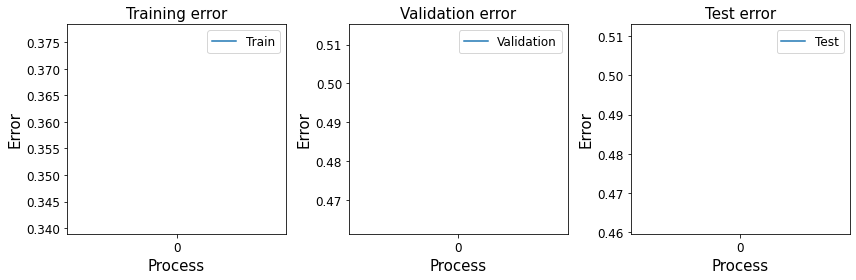

In [ ]:
improvement_log_train = []
improvement_log_val = []
improvement_log_test = []
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)


In [ ]:
# Step 15: Save models to disk. We can save the latest model to the local disk, 
# and avoid re-training in the future (this is also called a pre-trained model).

from tensorflow.keras.models import load_model
# Step 15.1: save model to local file
model.save("CIFAR10_model_simple.h5")

# Step 15.2: reload model from the local file
model_loaded = load_model("CIFAR10_model_simple.h5")

# Step 15.3: you are supposed to see same performance as previous one
y_test_pred = np.argmax(model.predict(X_test_flatten), axis=-1) 
Test_error_s = 1 - accuracy_score(y_test, y_test_pred)

print("Test results: ",Test_error_s)

Test results:  0.48629999999999995


In [ ]:
# Step 16: second attempt: Check if feature normalization improves results 

def build_model(n_layers = 2, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
          model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions

    model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation
    return model

In [ ]:
model = build_model(n_layers = 3, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])


In [ ]:
# Step 16.2: Apply feature normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

In [ ]:
# Step 16.3: Training the model on the scaled data
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 20) # Make sure using scaled training and scaled validation. 

# Step 16.4: Evaluate this model again to see any improvements
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

Epoch 1/20
313/313 [==============================] - 4s 11ms/step - loss: 1.7422 - accuracy: 0.4057 - val_loss: 1.5761 - val_accuracy: 0.4383
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 1.4712 - accuracy: 0.4812 - val_loss: 1.4800 - val_accuracy: 0.4765
Epoch 3/20
313/313 [==============================] - 3s 9ms/step - loss: 1.3587 - accuracy: 0.5203 - val_loss: 1.4970 - val_accuracy: 0.4816
Epoch 4/20
313/313 [==============================] - 2s 8ms/step - loss: 1.2700 - accuracy: 0.5531 - val_loss: 1.4449 - val_accuracy: 0.5036
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 1.1928 - accuracy: 0.5806 - val_loss: 1.4762 - val_accuracy: 0.4951
Epoch 6/20
313/313 [==============================] - 3s 8ms/step - loss: 1.1332 - accuracy: 0.5990 - val_loss: 1.4530 - val_accuracy: 0.5120
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 1.0629 - accuracy: 0.6220 - val_loss: 1.4696 - val_accuracy: 0.5115
Epoch

In [ ]:
# Step 16.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)


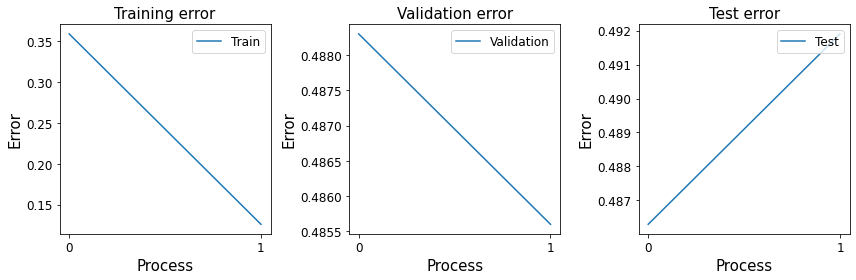

In [ ]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)


In [ ]:
# Step 17:  Third attempt: increase model complexity by adding more hidden layers

def build_model(n_layers = 5, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
          model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions

    model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation
    return model


In [ ]:
# Step 17.1: let's increase the number of layers in model definition 
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Step 17.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 17.3: Let's start retraining the model
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 20)
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

Epoch 1/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7306 - accuracy: 0.3877 - val_loss: 1.5765 - val_accuracy: 0.4422
Epoch 2/20
313/313 [==============================] - 2s 5ms/step - loss: 1.4974 - accuracy: 0.4703 - val_loss: 1.4886 - val_accuracy: 0.4784
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 1.3802 - accuracy: 0.5128 - val_loss: 1.4421 - val_accuracy: 0.4981
Epoch 4/20
313/313 [==============================] - 2s 5ms/step - loss: 1.2911 - accuracy: 0.5435 - val_loss: 1.4317 - val_accuracy: 0.5005
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 1.2026 - accuracy: 0.5724 - val_loss: 1.4038 - val_accuracy: 0.5202
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 1.1266 - accuracy: 0.5973 - val_loss: 1.4253 - val_accuracy: 0.5083
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 1.0503 - accuracy: 0.6226 - val_loss: 1.4159 - val_accuracy: 0.5217
Epoch 

In [ ]:
# Step 17.4: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

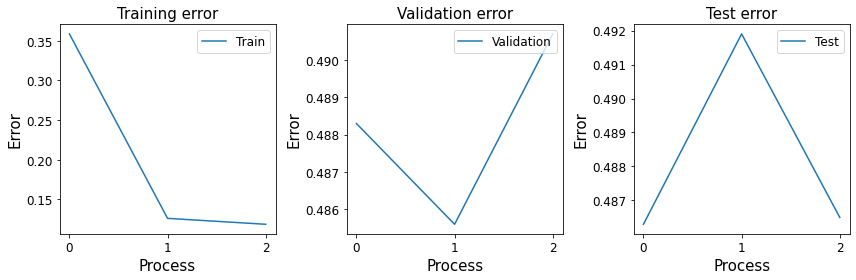

In [ ]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)


In [ ]:
# Step18：In Step 17,  it seems overfitting appears, you will see overfitting by increasing epoches.
# Step 18: forth attempt: increase the epoches during training
def build_model(n_layers = 5, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
          model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions

    model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation
    return model
    

In [ ]:
# Step 18.1: let's use the same architecture in Step 17
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Step 18.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 18.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 10)

Epoch 1/10
313/313 [==============================] - 2s 6ms/step - loss: 1.7249 - accuracy: 0.3893 - val_loss: 1.5874 - val_accuracy: 0.4409
Epoch 2/10
313/313 [==============================] - 2s 5ms/step - loss: 1.4971 - accuracy: 0.4712 - val_loss: 1.5044 - val_accuracy: 0.4717
Epoch 3/10
313/313 [==============================] - 2s 5ms/step - loss: 1.3758 - accuracy: 0.5120 - val_loss: 1.4487 - val_accuracy: 0.4942
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 1.2884 - accuracy: 0.5424 - val_loss: 1.4324 - val_accuracy: 0.4967
Epoch 5/10
313/313 [==============================] - 2s 5ms/step - loss: 1.1986 - accuracy: 0.5738 - val_loss: 1.4228 - val_accuracy: 0.5017
Epoch 6/10
313/313 [==============================] - 2s 5ms/step - loss: 1.1219 - accuracy: 0.5985 - val_loss: 1.4842 - val_accuracy: 0.5063
Epoch 7/10
313/313 [==============================] - 2s 5ms/step - loss: 1.0526 - accuracy: 0.6228 - val_loss: 1.5226 - val_accuracy: 0.5112
Epoch 

In [ ]:
# Step 18.4: let's evaluate the model again, I expected to see worse validation results due to overfitting
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

Train error:  0.258525
Validation error:  0.4777
Test error:  0.4806


In [ ]:
# Step 18.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

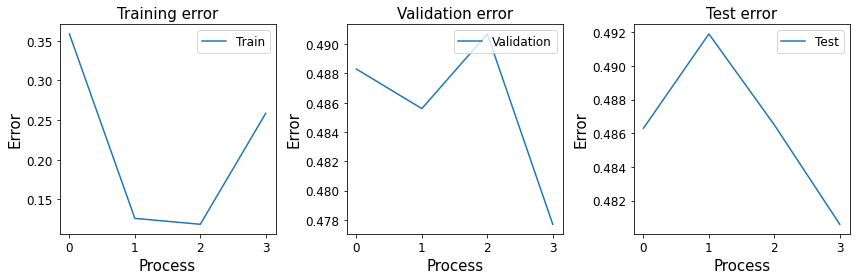

In [ ]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

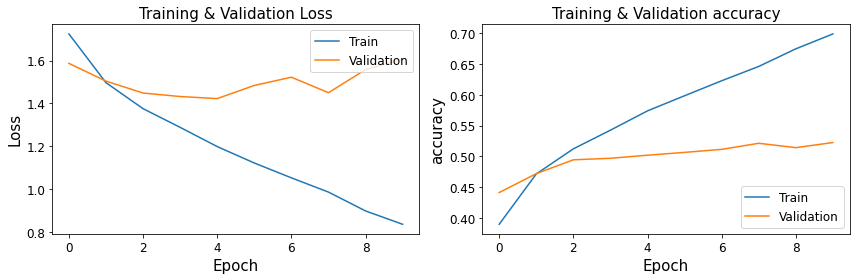

In [ ]:
# Step 19: In previous step, as you see, the overfitting indeed happens. Looking 
# into accuracy may not be very straightforward. If we visualize the learning 
# curves from the training step, you will get plots as follows:

# Step 19: Visualize the learning curves during training to diagnose the overfitting
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

# Step 19.1: Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)

# Step 19.2: Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
## Step 20: add a dropout layer to avoid overfitting
from tensorflow.python.keras.layers import Dropout
def build_model(n_layers = 2, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
        model.add(Dense(n_neurons, activation = 'relu'))
        model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax')) 
    return model

# Step 20.1: let's use the same architecture in Step 17
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

# Step 20.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 20.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30)
# Step 20.4: let's evaluate the model again, I expected to see better validation results as we use regularizations
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

Epoch 1/30
313/313 [==============================] - 3s 6ms/step - loss: 1.8518 - accuracy: 0.3443 - val_loss: 1.6647 - val_accuracy: 0.4079
Epoch 2/30
313/313 [==============================] - 2s 5ms/step - loss: 1.6460 - accuracy: 0.4181 - val_loss: 1.5823 - val_accuracy: 0.4339
Epoch 3/30
313/313 [==============================] - 2s 5ms/step - loss: 1.5579 - accuracy: 0.4490 - val_loss: 1.5375 - val_accuracy: 0.4510
Epoch 4/30
313/313 [==============================] - 2s 5ms/step - loss: 1.5040 - accuracy: 0.4717 - val_loss: 1.4839 - val_accuracy: 0.4690
Epoch 5/30
313/313 [==============================] - 2s 5ms/step - loss: 1.4590 - accuracy: 0.4864 - val_loss: 1.4560 - val_accuracy: 0.4842
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 1.4212 - accuracy: 0.4999 - val_loss: 1.4430 - val_accuracy: 0.4873
Epoch 7/30
313/313 [==============================] - 2s 5ms/step - loss: 1.3847 - accuracy: 0.5113 - val_loss: 1.4506 - val_accuracy: 0.4944
Epoch 

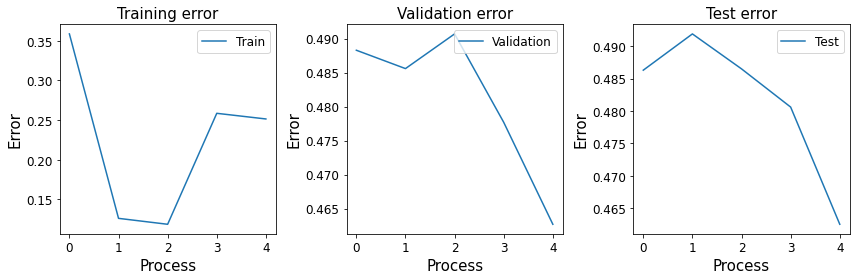

In [ ]:
# Step 20.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [ ]:
# Step 21.1: Adding normalization layer
from keras.layers import Dropout
from keras.layers import BatchNormalization

def build_model(n_layers = 2, n_neurons = 1000):
   model = Sequential() # create Sequential model
   for i in range(n_layers-1):
       model.add(Dense(n_neurons, activation = 'relu'))
       model.add(BatchNormalization()) # add normalization here
       model.add(Dropout(0.2))
   model.add(Dense(10, activation = 'softmax')) 
   return model

# Step 21.2: retraining the model with same settings
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

# Step 21.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 21.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30)

# Step 21.4: let's evaluate the model again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

Epoch 1/30
313/313 [==============================] - 6s 9ms/step - loss: 1.9596 - accuracy: 0.3428 - val_loss: 1.5962 - val_accuracy: 0.4450
Epoch 2/30
313/313 [==============================] - 2s 8ms/step - loss: 1.6079 - accuracy: 0.4356 - val_loss: 1.4858 - val_accuracy: 0.4747
Epoch 3/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4685 - accuracy: 0.4818 - val_loss: 1.4212 - val_accuracy: 0.4884
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 1.3811 - accuracy: 0.5131 - val_loss: 1.4186 - val_accuracy: 0.5020
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 1.3188 - accuracy: 0.5307 - val_loss: 1.3740 - val_accuracy: 0.5182
Epoch 6/30
313/313 [==============================] - 2s 7ms/step - loss: 1.2433 - accuracy: 0.5574 - val_loss: 1.3793 - val_accuracy: 0.5242
Epoch 7/30
313/313 [==============================] - 2s 7ms/step - loss: 1.1940 - accuracy: 0.5736 - val_loss: 1.3613 - val_accuracy: 0.5341
Epoch 

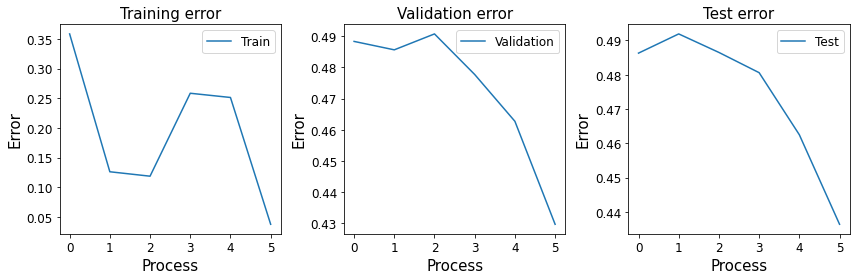

In [ ]:
# Step 21.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [ ]:
# Step 22.1: Add early stop into model training 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]



In [ ]:
# Step 21.2: retraining the model with same settings
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Step 21.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 21.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30)

Epoch 1/30
313/313 [==============================] - 3s 9ms/step - loss: 1.4767 - accuracy: 0.4790 - val_loss: 1.4249 - val_accuracy: 0.4924
Epoch 2/30
313/313 [==============================] - 2s 7ms/step - loss: 1.3827 - accuracy: 0.5107 - val_loss: 1.4058 - val_accuracy: 0.5097
Epoch 3/30
313/313 [==============================] - 2s 8ms/step - loss: 1.3155 - accuracy: 0.5345 - val_loss: 1.3543 - val_accuracy: 0.5289
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 1.2554 - accuracy: 0.5523 - val_loss: 1.3780 - val_accuracy: 0.5231
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 1.2016 - accuracy: 0.5748 - val_loss: 1.3751 - val_accuracy: 0.5259
Epoch 6/30
313/313 [==============================] - 2s 7ms/step - loss: 1.1486 - accuracy: 0.5903 - val_loss: 1.3499 - val_accuracy: 0.5391
Epoch 7/30
313/313 [==============================] - 2s 7ms/step - loss: 1.0940 - accuracy: 0.6133 - val_loss: 1.3117 - val_accuracy: 0.5490
Epoch 

In [ ]:
help(tf)

In [ ]:

# Step 21.4: let's evaluate the model again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

Train error:  0.03717499999999996
Validation error:  0.42769999999999997
Test error:  0.4335


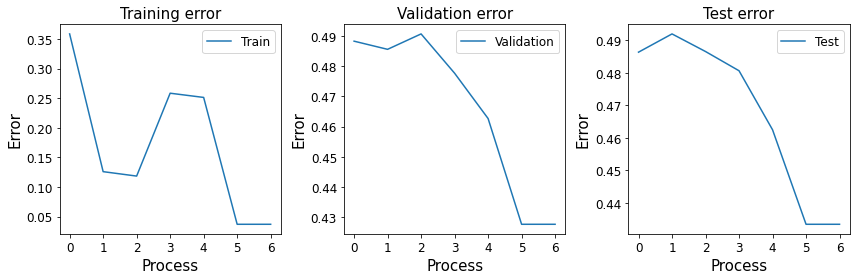

In [ ]:
# Step 21.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)


In [ ]:
# # del(improvement_log_test[-1])
# improvement_log_test

[0.48629999999999995, 0.4919, 0.48650000000000004, 0.4806, 0.4625]

In [ ]:
# Step 23: Use a convolutional neural network to improve the classification
# Step 23.1: Load dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Step 23.2: Process the labels to get one-hot encoding
num_classes = len(labels_map)
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [ ]:

# Step 23.3: Normalize the features using min-max
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [ ]:
# Step 23.4: Get training, validation dataset
X_train_s, X_val, y_train_s, y_val = train_test_split(X_train,y_train , test_size=0.2, random_state=42)

In [ ]:
# Step 23.5: Define convolutional neural network
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout
model = Sequential() # create Sequential model
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), padding='same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10, activation = 'softmax')) 

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])


In [ ]:
# Step 23.6: Start model training
history = model.fit(X_train_s,y_train_s, validation_data=(X_val,y_val), batch_size=64, epochs = 20)

Epoch 1/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6218 - accuracy: 0.7829 - val_loss: 0.9315 - val_accuracy: 0.6965
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6095 - accuracy: 0.7889 - val_loss: 0.8161 - val_accuracy: 0.7302
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6110 - accuracy: 0.7851 - val_loss: 0.9340 - val_accuracy: 0.6970
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.5978 - accuracy: 0.7890 - val_loss: 0.8345 - val_accuracy: 0.7289
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.5885 - accuracy: 0.7952 - val_loss: 0.7825 - val_accuracy: 0.7469
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.5856 - accuracy: 0.7952 - val_loss: 0.7931 - val_accuracy: 0.7412
Epoch 7/20
625/625 [==============================] - 4s 6ms/step - loss: 0.5819 - accuracy: 0.7952 - val_loss: 0.8292 - val_accuracy: 0.7336
Epoch 

In [ ]:
# Step 23.7: Let's evaluate model and visualize the improvements again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train_s),(X_val,y_val),(X_test,y_test))

improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

ValueError: ignored